In [39]:
from huggingface_hub import hf_hub_download
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
llc_files = [hf_hub_download(
    "cybershiptrooper/oohv6uys_ckpts",
    repo_type="dataset",
    filename=f"llc/llc_output_it_{it}.pkl",
    local_dir="./cache",
) for it in range(100, 1001, 100)]

/Users/cybershiptrooper/src/interpretability/devinterp/ConceptPercolation/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
llcs = []
for file in llc_files:
    with open(file, "rb") as f:
        data = pickle.load(f)
        llcs.append(data)

In [32]:
llcs[0].keys()

dict_keys(['init_loss', 'llc/means', 'llc/stds', 'llc/trace', 'loss/trace'])

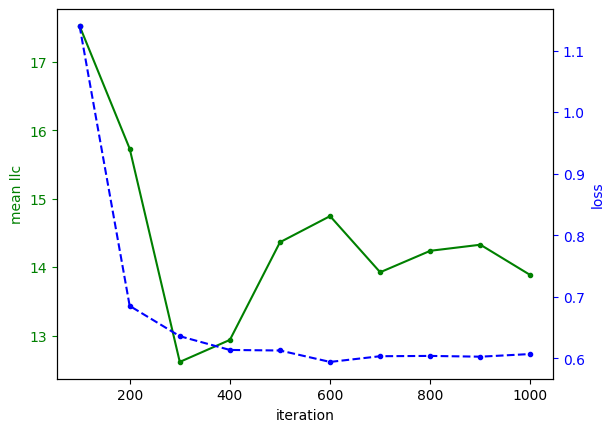

In [71]:
x = list(range(100, 1001, 100))
y = [llc["llc/means"][-1] for llc in llcs]
y_err = [llc["llc/stds"][-1] for llc in llcs]
y_loss = [llc["init_loss"] for llc in llcs]
# plt.plot(x, y)

# plot x and y_loss with a scale on the right side
fig, ax1 = plt.subplots()
ax1.plot(x, y, 'g.-')
#fill between
# ax1.fill_between(x, [y[i] - y_err[i] for i in range(len(y))], [y[i] + y_err[i] for i in range(len(y))], color='g', alpha=0.2)
ax1.set_xlabel('iteration')
ax1.set_ylabel('mean llc', color='g')
ax1.tick_params('y', colors='g')

ax2 = ax1.twinx()
ax2.plot(x, y_loss, 'b.--')
ax2.set_ylabel('loss', color='b')
ax2.tick_params('y', colors='b')

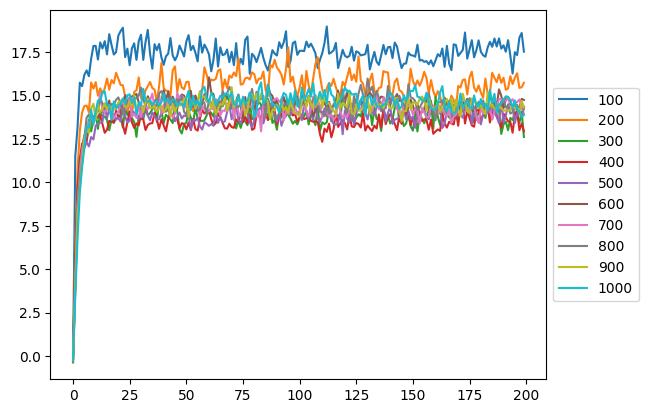

In [49]:
llc_traces = np.array([llc["llc/trace"] for llc in llcs])
meaned_traces = llc_traces.mean(axis=1)

for trace in meaned_traces:
    plt.plot(trace)
    plt.legend(list(range(100, 1001, 100)), loc='center left', bbox_to_anchor=(1, 0.5))

17.156965 +/- 2.674828


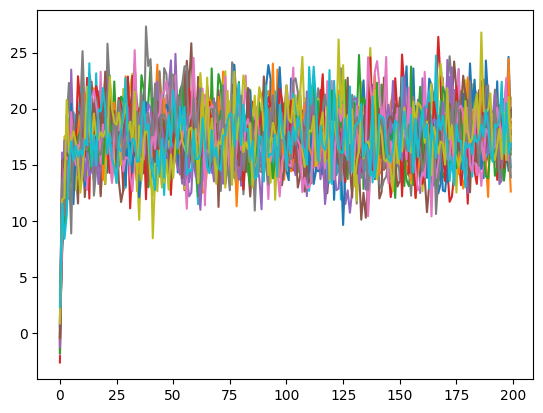

In [68]:
for trace in llc_traces[0]:
    plt.plot(trace)

print(llc_traces[0][-1].mean(), "+/-", llc_traces[0][-1].std())